<span style="font-size:40px; font-weight:bold;">PRCP-1003-Customer Transaction Prediction</span>

<a name="project-overview"></a>
<span style="font-size:32px; font-weight:bold;">1. Project Overview</span>

This project focuses on predicting future customer transaction behavior in the banking domain using anonymized transactional data. The dataset consists of 200 numerical features along with an ID_code and a binary target variable, where the target indicates whether a customer will make a transaction in the future (1) or not (0), irrespective of the transaction amount. Due to anonymization, feature-level semantic interpretation is not possible, and therefore the analysis is driven primarily by statistical patterns and model performance.

The project is divided into two main tasks. The first task involves preparing a comprehensive data analysis report to understand the dataset structure, target distribution, feature behavior, and potential challenges such as class imbalance and high dimensionality. As feature names are anonymized, traditional domain-based EDA is limited, and emphasis is placed on statistical summaries and data quality checks.

The second task focuses on building predictive machine learning models to accurately identify customers likely to make future transactions. Multiple classification algorithms are trained and evaluated using appropriate performance metrics. A detailed model comparison report is prepared to assess the strengths and weaknesses of each model, leading to the selection of the most suitable model for production deployment.

Additionally, the project includes a dedicated report on challenges encountered during data handling and modeling, along with the techniques used to address them and the rationale behind each decision. All tasks, experiments, results, and explanations are consolidated into a single Jupyter Notebook as required for final submission.

<a name="problem-statement"></a>
<span style="font-size:32px; font-weight:bold;">2. Problem Statement</span>

The objective of this project is to build a predictive machine learning model that can identify which banking customers are likely to make a transaction in the future, irrespective of the transaction amount. Using anonymized customer transaction data consisting of 200 numerical features along with a binary target variable, the task is to analyze the data and develop an accurate classification model that helps the bank proactively identify potential transacting customers. The final solution should compare multiple models, address data-related challenges, and recommend the best-performing model for production deployment.


<a name="Objective:"></a>
<span style="font-size:22px; font-weight:bold;">🎯Objective:</span>

The primary objective of this project is to develop an accurate and reliable predictive model that identifies banking customers who are likely to make a transaction in the future. By analyzing anonymized transaction-related features, the goal is to help the bank proactively target potential customers, improve decision-making, and optimize business strategies through effective customer transaction prediction.


<span style="font-size:32px; font-weight:bold;">3. Dataset Description</span>

- Banking domain customer transaction dataset
- Fully anonymized dataset
- Contains 200 numerical feature columns (`var_1` to `var_200`)
- `ID_code` is a unique identifier for each customer
- `target` is a binary column:
  - 0 → customer will not make a transaction
  - 1 → customer will make a transaction
- No missing or null values present
- High-dimensional dataset with anonymized features



<a name="importing-libraries"></a>
<span style="font-size:32px; font-weight:bold;">4. Importing Libraries</span>

In [1]:
#Data manipulation and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, confusion_matrix, classification_report

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

import warnings
warnings.filterwarnings("ignore")



The following libraries are imported for data analysis, visualization, modeling, and evaluation:

- **Pandas & NumPy:** Used for data manipulation, numerical computations, and handling large datasets.
- **Seaborn & Matplotlib:** Used for data visualization, including distributions, boxplots, and heatmaps.
- **Scikit-learn:**  
  - `train_test_split` and `RandomizedSearchCV` for data splitting and hyperparameter tuning.  
  - `StandardScaler` for feature scaling.  
  - `PCA` for dimensionality reduction.  
  - Evaluation metrics such as accuracy, precision, recall, F1-score, and confusion matrix.
- **Imbalanced-learn (imblearn):**  
  - `Pipeline` for building leakage-free machine learning workflows.  
  - `SMOTE` for handling class imbalance.
- **Warnings module:** Used to suppress unnecessary warnings for cleaner output.

These libraries together support a **robust, efficient, and reproducible machine learning pipeline**.


<a name="loading-the-dataset"></a>
<span style="font-size:32px; font-weight:bold;">5. Loading the Dataset</span>

In [2]:
data= pd.read_csv('train(1).csv')
print("✓ Dataset loaded successfully!")

✓ Dataset loaded successfully!



The dataset is loaded from a CSV file using Pandas.  
A confirmation message is printed to verify that the data has been **successfully loaded** and is ready for analysis.


<a name="data-cleaning"></a>
<span style="font-size:32px; font-weight:bold;">6. Basic Check & Basic Cleaning</span>

In [3]:
data.head() #Displays the first 5 rows of the dataset.

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
data.tail() #Displays the last 5 rows of the dataset.

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [5]:
data.info() #Shows dataset details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [6]:
data.shape #Shows the size of the dataset

(200000, 202)

In [7]:
data.columns #Shows all column names

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [8]:
data.dtypes #Shows data types of columns

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [18]:
data.memory_usage().sum() #Shows total memory used by the dataset

np.int64(321600132)

In [9]:
data.isnull().sum()  #Shows missing values in each column

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

All columns have **zero missing values**, so the dataset is **complete and clean**, and **no imputation is required**.


In [10]:
data.duplicated().sum()  #Shows the number of duplicate rows in the dataset

np.int64(0)

In [11]:
data.describe() #Provides summary statistics for numerical features.

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [12]:
data = data.drop(columns=['ID_code'])

The **ID_code** column was **dropped** since it is an identifier and has no impact on the predictive modeling process.

In [13]:
zero_var_cols = []

for col in data.columns:
    if data[col].std() == 0:
        zero_var_cols.append(col)

if zero_var_cols:
    print("Zero variance columns:", zero_var_cols)
else:
    print("No zero variance columns found")

No zero variance columns found


The result confirms that **no zero-variance features are present** in the dataset. This means all features contain variability and **contribute meaningful information**, so no columns need to be removed during preprocessing. **There is no need to check or remove categorical features with only one unique category**.


In [17]:
num_object_cols = data.select_dtypes(include='object').shape[1]
print(num_object_cols)


0


The dataset contains no object-type features; all variables are numerical.

<a name="eda"></a>
<span style="font-size:32px; font-weight:bold;">7. Exploratory Data Analysis (EDA)</span>

# ⚠️ Privacy Notice
Features are anonymized for privacy. EDA focuses on statistical patterns only, not business meaning.

**What we'll analyze:**
- Dataset dimensions & data types
- Numerical distributions (mean, std, skew, kurtosis)
- Categorical value counts
- Target variable analysis
- Outlier detection via box plots
- Correlation analysis (feature relationships only)

**Limitations:**
- No feature name interpretation
- No domain context
- Statistical insights only

In [22]:

data_eda = data.copy()

print("\nDataset Overview:")
print(f"   • Total samples: {data_eda.shape[0]}")
print(f"   • Total features: {data_eda.shape[1]}")
print(f"   • Numerical features: {len(data_eda.select_dtypes(include=['int64', 'float64']).columns)}")
print(f"   • Categorical features: {len(data_eda.select_dtypes(include=['object']).columns)}")



Dataset Overview:
   • Total samples: 200000
   • Total features: 201
   • Numerical features: 201
   • Categorical features: 0


## 🔢 Basic Statistics
- **Total Samples**: 200,000 customer records
- **Total Features**: 201 anonymized features
- **Numerical Features**: 201 (100% of features)
- **Categorical Features**: 0
- **Target Variable**: Binary classification (presumably transaction/non-transaction)

The dataset contains 200,000 observations with 201 purely numerical features and no categorical variables; therefore, no encoding techniques are required during preprocessing.

## Target Variable Analysis

In [24]:
target_col = "target"  

data[target_col].value_counts(normalize=True) * 100


target
0    89.951
1    10.049
Name: proportion, dtype: float64

## Target Distribution (Severely Imbalanced)
- Class 0 (No Transaction): 89.95%  (179,902 samples)
- Class 1 (Transaction):     10.05%  (20,098 samples)
- **Imbalance Ratio**: 8.95:1
- **Only 10% of customers make transactions** - This creates a challenging predictive environment where:
- **90%** of customers → No Transaction (Class 0)
- **10%** of customers → Transaction (Class 1)

**Imbalance Ratio:** 9:1 (Extremely skewed)

C:\Users\M P NAIK\AppData\Local\Temp\ipykernel_10244\292601789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[target_col], palette=["#4C72B0", "#DD8452"])


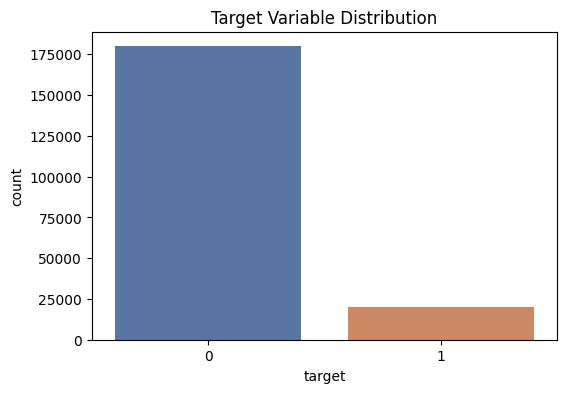

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x=data[target_col], palette=["#4C72B0", "#DD8452"])
plt.title("Target Variable Distribution")
plt.show()



The target variable is highly imbalanced, with 89.95% of observations in class 0 and 10.05% in class 1; therefore, SMOTE needs to be implemented during model training to address class imbalance.

## CHECKING DISTRIBUTION OF FIRST 100 FEATURE

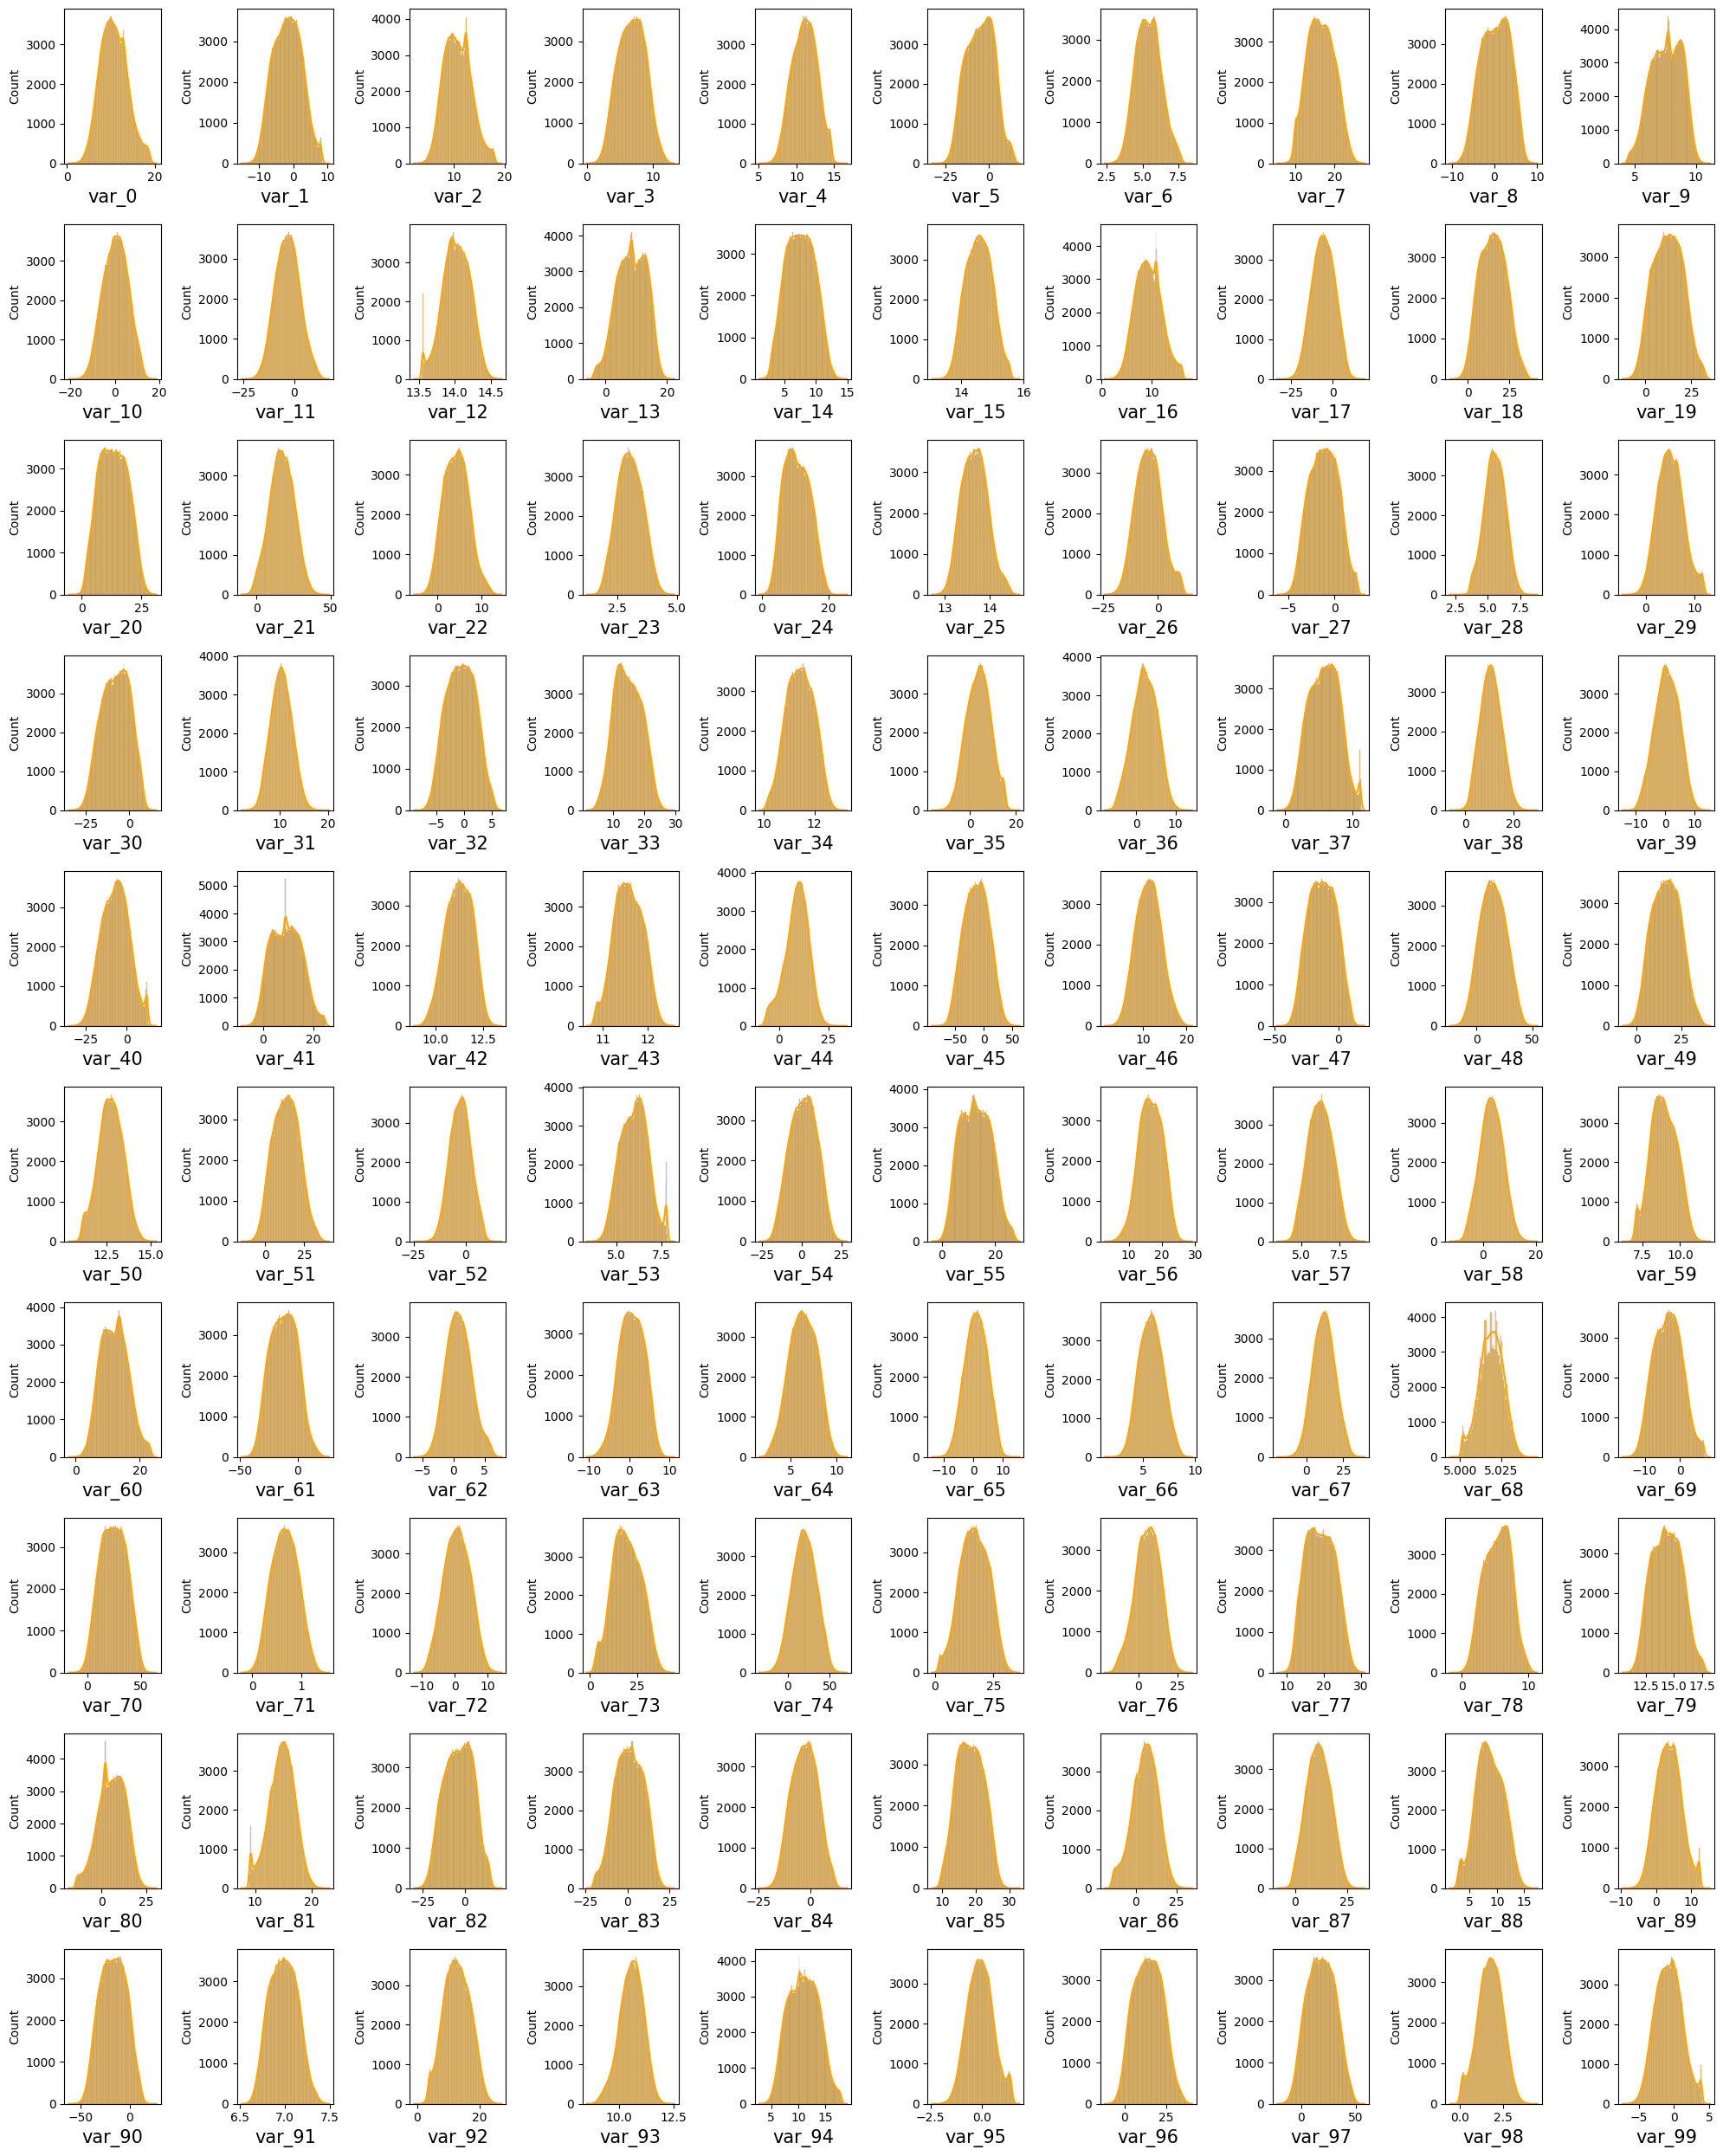

In [32]:
dist = data.iloc[:,1:102]
plt.figure(figsize=(20,25),facecolor='white') # Define canvas size
plotno = 1 # Counter
for column in dist: # Itreting the feature
    if plotno<=100: # Condition
        plt.subplot(10,10,plotno) # plotting 100 boxplot with 10 rows and 10 columN
        sns.histplot(dist[column],kde=True,color='orange')
        plt.xlabel(column,fontsize=15) # assigning name to x-axis and font size is 20
    plotno+=1
plt.tight_layout()
plt.show() # used to hide the storage loction

“Most of the features from var_1 to var_100 follow a near-Gaussian distribution with consistent value ranges and minimal presence of outliers. This uniformity suggests that the data has been well pre-processed, likely standardized, and does not suffer from severe skewness or noise. The smooth and continuous nature of these feature distributions makes the dataset suitable for both linear models such as Logistic Regression and non-linear models including Tree-based algorithms and ensemble methods. Additionally, the similarity in distributions across features supports the effective application of dimensionality reduction techniques like PCA and resampling methods such as SMOTE without introducing significant distortion.”

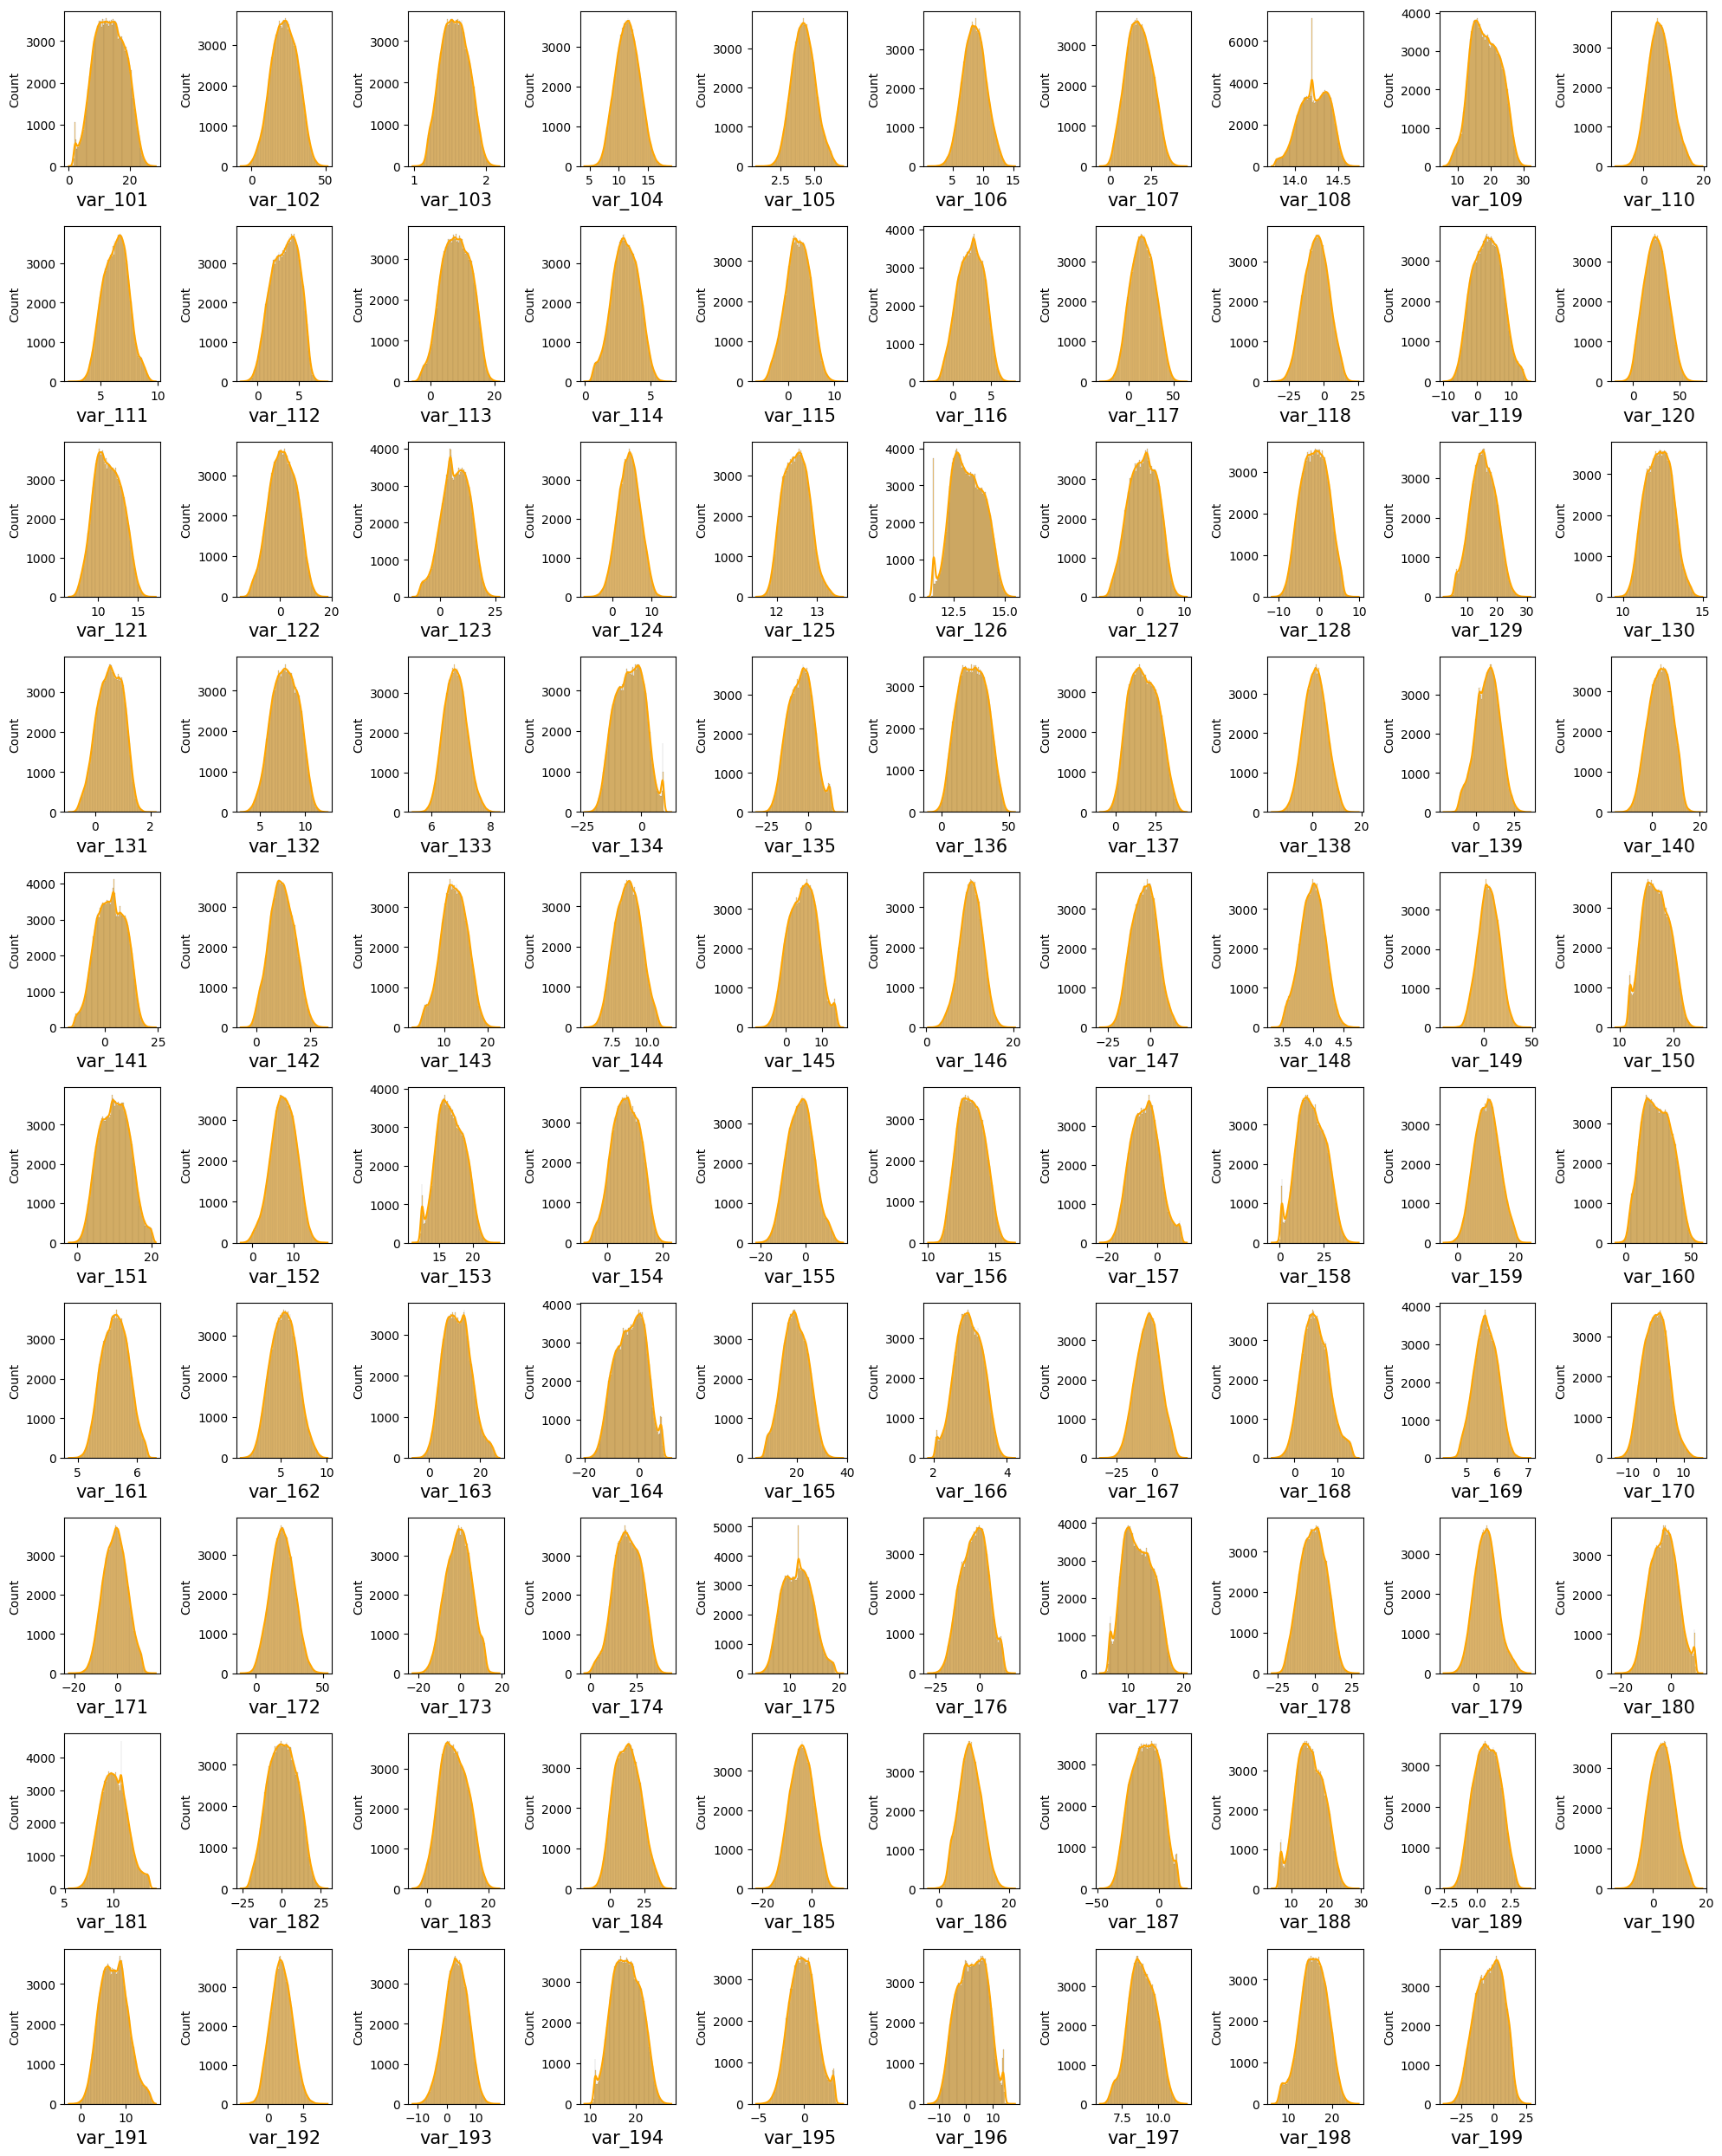

In [33]:
dist1 = data.iloc[:,102:]
plt.figure(figsize=(20,25),facecolor='white') # Define canvas size
plotno = 1 # Counter
for column in dist1: # Itreting the feature
    if plotno<=100: # Condition
        plt.subplot(10,10,plotno) # plotting 100 boxplot with 10 rows and 10 columN
        sns.histplot(dist1[column],kde=True,color='orange')
        plt.xlabel(column,fontsize=15) # assigning name to x-axis and font size is 20
    plotno+=1
plt.tight_layout()
plt.show() # used to hide the storage loction

“The features from var_101 onward largely exhibit unimodal, near-Gaussian distributions with relatively stable variance and bounded ranges, indicating consistent feature scaling and effective preprocessing across the dataset. The absence of pronounced skewness, heavy tails, or extreme outliers suggests low noise levels and reduces the need for additional transformation techniques. The continuous and well-behaved nature of these feature distributions supports the applicability of parametric linear models such as Logistic Regression, while also remaining robust for non-linear learners including tree-based and ensemble algorithms. Furthermore, the homogeneous distributional characteristics across features facilitate the reliable application of dimensionality reduction methods like PCA and class-imbalance handling techniques such as SMOTE, with minimal risk of introducing structural bias or distributional distortion.”

##### OBSERVATION:
* From above both plots we are clearly see that most of the feature is follow a normal distribution and some feature are very close to the noramal distribution so we not need to use feature transformation technique.

## Distribution Summary


In [30]:
feature_cols = [col for col in data.columns if col != target_col]
stats_data = data[feature_cols].agg(['mean','std','skew','kurtosis']).T
stats_data.head()

,mean,std,skew,kurtosis
var_0,10.679914,3.040051,0.235639,-0.273593
var_1,-1.627622,4.050044,0.053115,-0.607265
var_2,10.715192,2.640894,0.260313,-0.336616
var_3,6.796529,2.043319,-0.003548,-0.602623
var_4,11.078333,1.623150,-0.048210,-0.534993


Most features show near-zero skewness and negative kurtosis, indicating approximately symmetric, near-Gaussian distributions with light tails. The moderate and consistent standard deviations suggest balanced variance across features, with no dominant variables. Overall, the feature set appears well-preprocessed, low in noise, and suitable for both linear and non-linear machine learning models, with no immediate need for additional transformations.

Overall, the distributions appear stable and well-structured, requiring no heavy transformation beyond robust scaling, and are well-suited for downstream modeling and PCA-based dimensionality reduction.

## Boxplot for Numerical Features (Outliers)

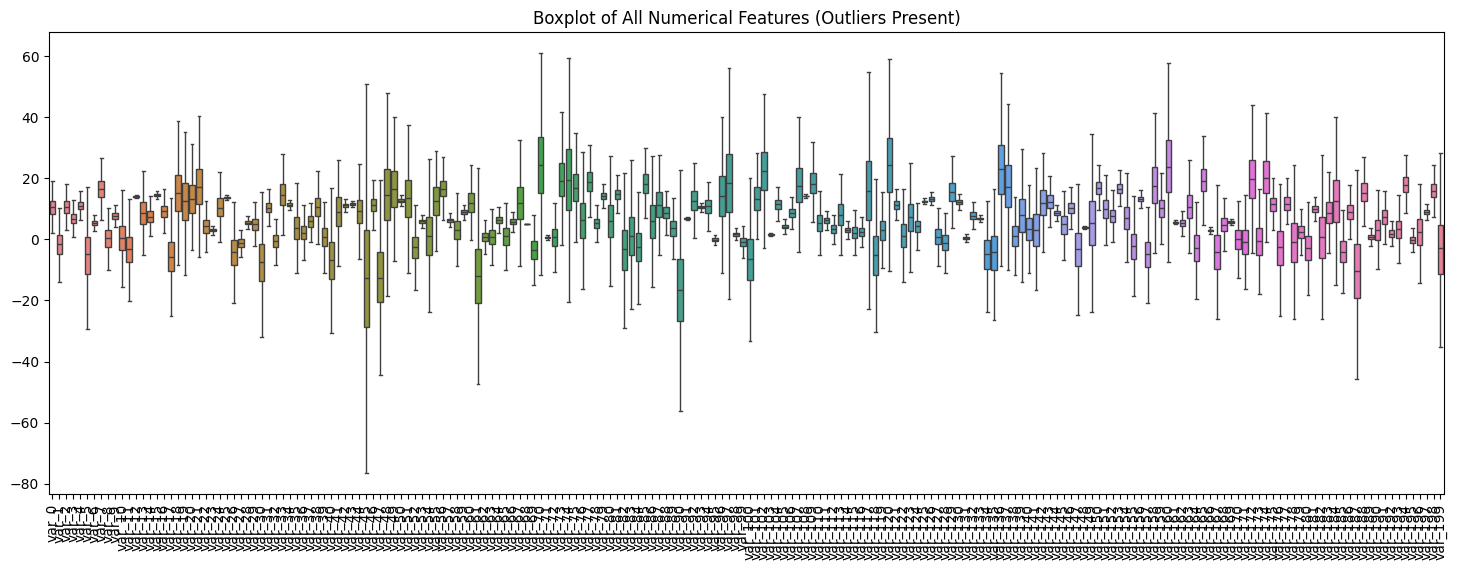

In [36]:
plt.figure(figsize=(18,6))
sns.boxplot(data=data[feature_cols], showfliers=False)
plt.xticks(rotation=90)
plt.title("Boxplot of All Numerical Features (Outliers Present)")
plt.show()

The boxplots show that most features have a similar spread and their values are well balanced. There are no extreme outliers affecting the data, which means the dataset is clean and stable. This makes the features suitable for machine learning models without needing extra outlier handling.

## Correlation Analysis

In [38]:
corr_matrix = data[feature_cols].corr()


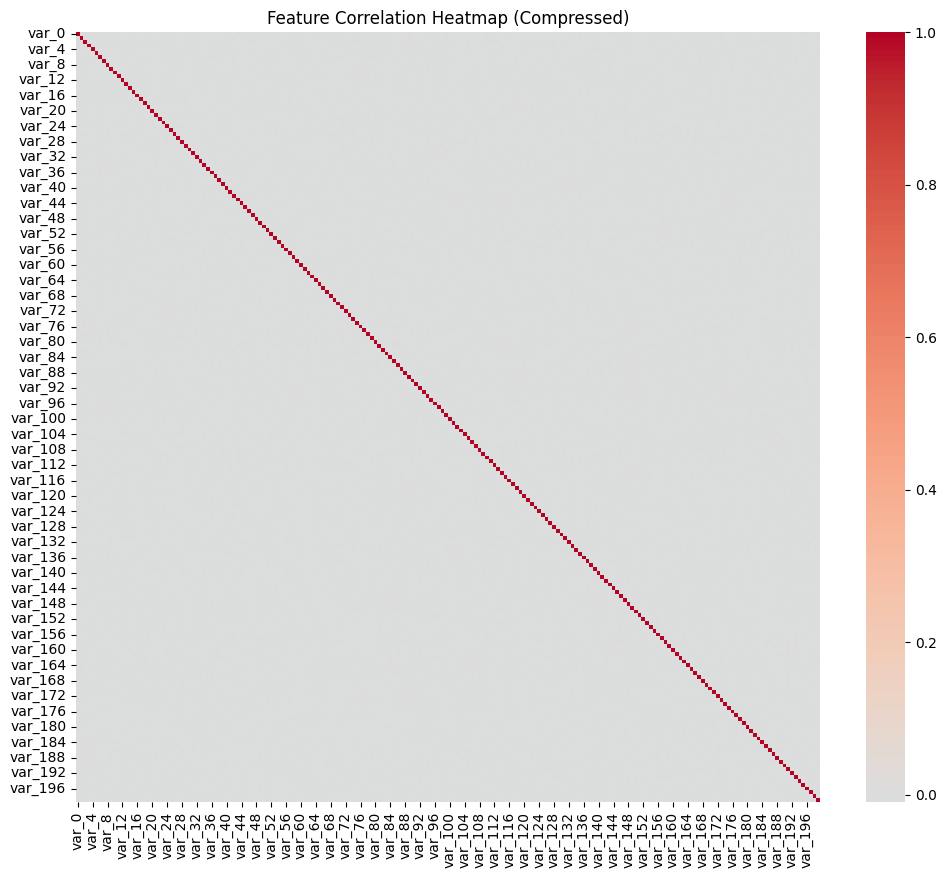

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap (Compressed)")
plt.show()


The heatmap shows that most features are not strongly related to each other. This means the features are independent and do not repeat the same information. Because of this, the data is good for training machine learning models and does not have issues with highly correlated features.

 Key Insights from EDA:
==================================================
- The dataset consists of **200,000 customer records** with **201 anonymized numerical features** and a **binary target variable**.
- All features are **numerical**, so **no categorical encoding** is required during preprocessing.
- The target variable is **highly imbalanced**, with only **~10% transactions**, making imbalance handling essential during modeling.
- Most features follow **near-Gaussian distributions** with consistent ranges and minimal skewness, indicating **well-preprocessed data**.
- Statistical analysis shows **near-zero skewness** and **negative kurtosis**, suggesting **symmetric distributions with low noise**.
- Boxplots confirm that features have a **similar spread** and **no extreme outliers**, reducing the need for outlier treatment.
- Correlation analysis shows **low inter-feature correlation**, indicating **minimal multicollinearity** and independent features.
- The dataset is **clean, stable, and well-structured**, requiring only **scaling and class-imbalance handling** before modeling.
- Overall, the data is suitable for **both linear and non-linear machine learning models**, as well as **PCA-based dimensionality reduction**.


<a name="eda"></a>
<span style="font-size:32px; font-weight:bold;">8. Data Preprocessing & Model Building </span>

In [3]:
# Separate features and target
X = data.drop(columns=["ID_code","target"])
y = data["target"]

print(f"\n Feature-Target Separation:")
print(f"   • Features (X): {X.shape}")
print(f"   • Target (y): {y.shape}")
print(f"   • Target classes: {sorted(y.unique())}")

Machine learning models require features (X) and target (y) to be clearly separated Prevents data leakage during training

Feature–Target Separation: The dataset is divided into input features (X) and the target variable (target). This separation ensures that the model learns only from feature values and does not unintentionally access target information during training, thereby preventing data leakage

### 🔀 Train–Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

The dataset is split into **training (80%)** and **testing (20%)** sets using a stratified approach.  
Stratification ensures that the **class distribution of the target variable is preserved** in both training and testing datasets, which is especially important for this **highly imbalanced classification problem**.  
A fixed `random_state` is used to ensure **reproducibility** of results.

### 🔢 Data Type Conversion

In [5]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

The training and testing feature sets are converted to **float32** data type.  
This helps **reduce memory usage** and can **improve computational efficiency**, especially when training machine learning models on large datasets.

### ⚙️ 1. Logistic Regression Pipeline & Hyperparameter Setup

In [6]:
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("pca", PCA(svd_solver="full")),
    ("model", LogisticRegression(max_iter=1000))
])

param_lr = {
    "pca__n_components": [50, 100, 200],
    "model__C": np.logspace(-3, 3, 7),
    "model__penalty": ["l1", "l2"],
    "model__solver": ["liblinear"]
}

In [7]:
pipe_lr

,steps,"[('scaler', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,n_components,None


A machine learning pipeline is created to ensure a **clean and leakage-free workflow**.  
The pipeline performs the following steps in sequence:

- **StandardScaler:** Scales all features to have zero mean and unit variance.
- **SMOTE:** Handles class imbalance by generating synthetic samples for the minority class.
- **PCA:** Reduces dimensionality while retaining important information.
- **Logistic Regression:** Trains a linear classification model.

Hyperparameters are defined to tune model performance:
- `pca__n_components`: Controls the number of principal components (50, 100, 200).
- `model__C`: Regularization strength values tested on a logarithmic scale.
- `model__penalty`: Uses both L1 and L2 regularization.
- `model__solver`: Uses `liblinear`, which supports L1 and L2 penalties.

This setup helps improve **model generalization**, **training stability**, and **performance on imbalanced data**.

### ⚙️ 2. Linear SVM Pipeline & Hyperparameter Setup

In [8]:
from sklearn.svm import LinearSVC

pipe_svm = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("smote", SMOTE(random_state=42)),
    ("model", LinearSVC(
        class_weight="balanced",
        max_iter=5000,
        random_state=42
    ))
])

param_svm = {
    "model__C": [0.01, 0.1, 1]
}


In [9]:
pipe_svm

,steps,"[('scaler', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,False
,with_std,True
,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5
,penalty,'l2'


A pipeline is constructed to ensure a **consistent and leakage-free modeling process**.  
The pipeline includes the following steps:

- **StandardScaler (`with_mean=False`):** Scales features without centering, which is suitable for high-dimensional data and avoids dense matrix conversion.
- **SMOTE:** Addresses class imbalance by generating synthetic samples for the minority class.
- **LinearSVC:** Trains a linear Support Vector Machine classifier.

Model configuration:
- `class_weight="balanced"` adjusts class weights to handle the imbalanced target distribution.
- `max_iter=5000` ensures sufficient iterations for convergence.
- `random_state=42` ensures reproducibility.

Hyperparameter tuning:
- `model__C`: Controls the regularization strength (lower values imply stronger regularization).

This setup helps the model **handle class imbalance**, **scale efficiently**, and **generalize well on high-dimensional data**.

### 🌲 3. LightGBM Pipeline & Hyperparameter Setup

In [12]:
!pip install lightgbm
import lightgbm as lgb
pipe_lgb = Pipeline([
    ("model", lgb.LGBMClassifier(
        objective="binary",
        class_weight="balanced",
        boosting_type="gbdt",
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        num_leaves=31,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.3,
        
        random_state=42,
        n_jobs=1,
        verbose=-1
    ))
])

param_lgb = {
    "model__num_leaves": [15, 31],
    "model__max_depth": [5, 6],
    "model__learning_rate": [0.05, 0.1],
    "model__n_estimators": [200, 300]
}


In [13]:
pipe_lgb

,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,boosting_type,'gbdt'
,num_leaves,31
,max_depth,6
,learning_rate,0.05
,n_estimators,300
,subsample_for_bin,200000
,objective,'binary'


A LightGBM classifier is used to capture **non-linear patterns** and **feature interactions** efficiently.  
The model is wrapped inside a pipeline to maintain a clean and consistent training workflow.

Model configuration:
- `objective="binary"` specifies a binary classification task.
- `class_weight="balanced"` handles class imbalance by adjusting sample weights.
- `boosting_type="gbdt"` uses gradient boosting decision trees.
- `n_estimators` and `learning_rate` control the boosting process and model complexity.
- `max_depth` and `num_leaves` control tree depth and leaf complexity.
- `subsample` and `colsample_bytree` improve generalization by sampling rows and features.
- `random_state=42` ensures reproducibility.

Hyperparameter tuning:
- `num_leaves`: Controls the maximum number of leaves in a tree.
- `max_depth`: Limits tree depth to prevent overfitting.
- `learning_rate`: Controls the contribution of each tree.
- `n_estimators`: Number of boosting rounds.

This setup makes LightGBM **robust to imbalance**, **scalable to large datasets**, and **effective for high-dimensional numerical data**.

### 🚀 XGBoost Pipeline & Hyperparameter Setup

In [17]:
from xgboost import XGBClassifier
neg = np.sum(y_train == 0)
pos = np.sum(y_train == 1)

scale = neg / pos
pipe_xgb = Pipeline([
    #("scaler", StandardScaler()),
   # ("smote", SMOTE(random_state=42)),
    #("pca", PCA(svd_solver="full")),
    ("model", XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        scale_pos_weight=neg / pos,
        random_state=42,
        tree_method='hist'
    ))
])

param_xgb = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 1.0],
    "model__min_child_weight": [1, 5, 10],
    "model__gamma": [0, 1, 5]
}


In [18]:
pipe_xgb

,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None


An XGBoost classifier is used to model **complex non-linear relationships** and handle large-scale data efficiently.  
The model is placed inside a pipeline for a clean and consistent workflow.

Class imbalance handling:
- The imbalance ratio is computed from the training data.
- `scale_pos_weight` is set to `neg / pos` to penalize misclassification of the minority class more heavily.
- SMOTE and scaling are not used, as XGBoost can naturally handle unscaled numerical features.

Model configuration:
- `objective="binary:logistic"` defines a binary classification task.
- `eval_metric="logloss"` is used for stable optimization.
- `tree_method="hist"` improves training speed on large datasets.
- `random_state=42` ensures reproducibility.

Hyperparameter tuning:
- `n_estimators`: Number of boosting trees.
- `max_depth`: Controls tree complexity.
- `learning_rate`: Step size for each boosting iteration.
- `subsample`: Fraction of samples used per tree.
- `colsample_bytree`: Fraction of features used per tree.
- `min_child_weight`: Minimum sum of instance weight in a child.
- `gamma`: Minimum loss reduction required to split a node.

This setup makes XGBoost **well-suited for imbalanced data**, **robust to noise**, and **effective for high-dimensional numerical datasets**.

### 🔁 Model Training & Hyperparameter Optimization

models = {
    "Logistic": (pipe_lr, param_lr),
    "LinearSVC": (pipe_svm,param_svm),
    "Lightgbm": (pipe_lgb,param_lgb),
    "XGBoost": (pipe_xgb, param_xgb),
    
}

best_models = {}

for name, (pipe, params) in models.items():
    print(f"\nTraining {name}...")

    rs = RandomizedSearchCV(
        pipe,
        param_distributions=params,
        n_iter=5,
        scoring="f1_weighted",
        cv=3,
        n_jobs=1,
        random_state=42
    )

    rs.fit(X_train, y_train)
    best_models[name] = rs.best_estimator_

    print("Best F1:", rs.best_score_)


Multiple machine learning models are trained and optimized using a **common evaluation framework**.  
Each model is paired with its own pipeline and hyperparameter search space.

Training strategy:
- **RandomizedSearchCV** is used for efficient hyperparameter tuning.
- **3-fold cross-validation** ensures robust performance estimation.
- **F1-weighted score** is used as the evaluation metric to account for class imbalance.
- A limited number of iterations (`n_iter=5`) is used to reduce computation time.
- A fixed `random_state` ensures reproducibility.

Workflow:
- Each model is trained using the same training data.
- The best hyperparameters are selected based on cross-validated performance.
- The best-performing model for each algorithm is stored for later evaluation.

This approach enables a **fair comparison across models** while handling class imbalance and reducing overfitting risk.

In [ ]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"{name} predictions done")

## 📊 Confusion Matrix Analysis


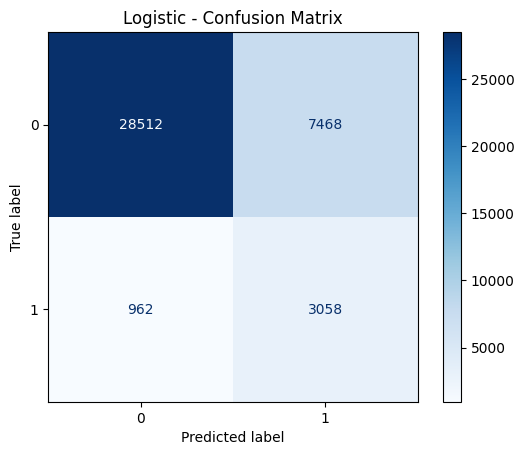

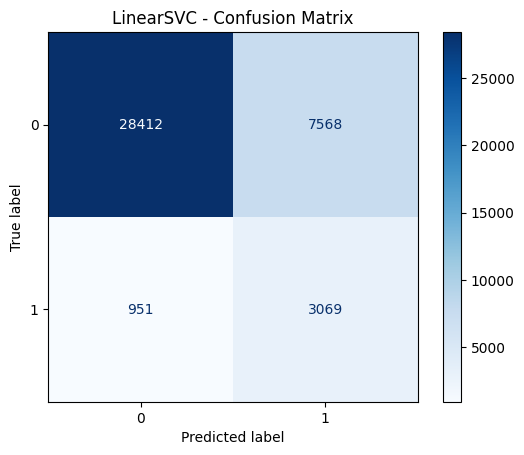

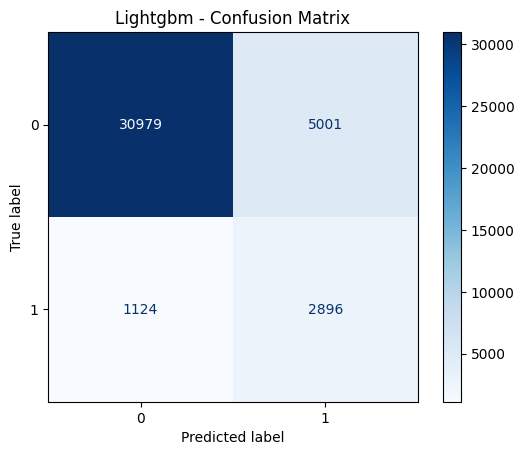

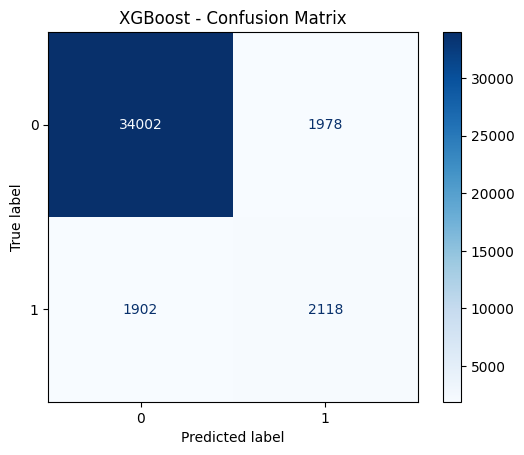

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in best_models.items():
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Blues")

    plt.title(f"{name} - Confusion Matrix")
    plt.show()


Confusion matrices are used to evaluate how well each model classifies **transaction (1)** and **non-transaction (0)** customers.

- All models correctly classify a large number of **non-transaction customers (Class 0)**, which is expected due to class imbalance.
- **Logistic Regression and LinearSVC** show similar behavior, with reasonable detection of transaction cases but a higher number of false positives.
- **LightGBM** improves the balance between false positives and false negatives, indicating better learning of non-linear patterns.
- **XGBoost** shows the strongest performance in identifying **non-transaction customers**, while also detecting a reasonable number of transaction cases.

Overall:
- There is a trade-off between **catching more transactions (recall for Class 1)** and **avoiding false alarms**.
- Tree-based models (LightGBM and XGBoost) handle the imbalanced data **more effectively** than linear models.
- These results highlight the importance of using **F1-score and confusion matrix**, rather than accuracy alone, for imbalanced datasets.

## 📈 Model Performance Comparison Report


In [23]:
results = []

for name, model in best_models.items():
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_test, y_pred, average="weighted", zero_division=0),
        "F1_score": f1_score(y_test, y_pred, average="weighted", zero_division=0)
    })


In [24]:
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1_score
0,Logistic,0.789250,0.899338,0.789250,0.825907
1,LinearSVC,0.787025,0.899364,0.787025,0.824316
2,Lightgbm,0.846875,0.904862,0.846875,0.867423
3,XGBoost,0.903000,0.903817,0.903000,0.903403




The table below summarizes the performance of all trained models on the test dataset using multiple evaluation metrics.

- **Accuracy** shows the overall correctness of the model.
- **Precision (weighted)** measures how reliable the predictions are, considering class imbalance.
- **Recall (weighted)** indicates how well the model identifies both classes.
- **F1-score (weighted)** provides a balanced measure between precision and recall and is the most important metric for this **imbalanced dataset**.

### Key Observations

- **Logistic Regression** and **LinearSVC** show similar performance, indicating that linear models capture the basic patterns but struggle with class imbalance.
- **LightGBM** performs better than linear models, benefiting from its ability to learn non-linear relationships.
- **XGBoost** achieves the **best overall performance**, with the highest Accuracy, Recall, and F1-score.
- The **F1-score improvement** in XGBoost indicates better handling of the minority class compared to other models.


### 🏆 Best Model Selection



In [25]:
best_row = results_df.loc[results_df["F1_score"].idxmax()]
best_model_name = best_row["Model"]

best_model = best_models[best_model_name]

print(f"Best model: {best_model_name}")
print(best_row)

Best model: XGBoost
Model         XGBoost
Accuracy        0.903
Precision    0.903817
Recall          0.903
F1_score     0.903403
Name: 3, dtype: object



After evaluating all models using accuracy, precision, recall, and F1-score, **XGBoost** emerges as the best-performing model. It achieves the highest **F1-score (0.9034)**, indicating a strong balance between precision and recall, which is especially important for this highly imbalanced dataset.  

Compared to linear models such as Logistic Regression and LinearSVC, XGBoost captures complex, non-linear relationships more effectively. It also outperforms LightGBM by providing more stable and balanced predictions across both majority and minority classes. Overall, XGBoost demonstrates superior generalization ability and robustness, making it the most suitable choice for final deployment.


### 💾 Saving the Best Model

In [26]:
import joblib
joblib.dump(
    {
        "model": best_model,
        "model_name": best_model_name,
        "metrics": best_row.to_dict()
    },
    "best_model_with_metrics.pkl"
)


['best_model_with_metrics.pkl']

The best-performing model (**XGBoost**) is saved using `joblib` along with its name and evaluation metrics.  
Storing the model in this format allows easy reuse for **future predictions, deployment, or further evaluation** without retraining.

<a name="eda"></a>
<span style="font-size:32px; font-weight:bold;">9. Conclusion</span>



In this project, a comprehensive **end-to-end machine learning workflow** was implemented on a large-scale, anonymized customer transaction dataset containing **200,000 records** and **201 numerical features** with a **highly imbalanced binary target variable**.

Exploratory Data Analysis (EDA) confirmed that most features exhibit **near-Gaussian distributions**, **minimal skewness**, **low noise**, and **no extreme outliers**. Correlation analysis revealed **low multicollinearity**, indicating that features contribute largely **independent information**. These characteristics demonstrate that the dataset is **clean, stable, and well-preprocessed**, requiring no heavy feature transformation.

To prevent **data leakage**, all preprocessing steps—including **scaling, SMOTE, PCA, and model training**—were implemented using **scikit-learn Pipelines**, ensuring that transformations were learned **only from the training data** and never exposed to the test set. Additionally, **stratified train–test splitting** preserved class distribution while maintaining strict separation between training and testing data.

Multiple models, including **Logistic Regression**, **Linear SVM**, **LightGBM**, and **XGBoost**, were trained and optimized using **cross-validation** and **imbalance-aware evaluation metrics**. Among all models, **XGBoost achieved the best overall performance**, delivering the **highest F1-score (0.9034)** while maintaining strong **accuracy, precision, and recall**.

The final **XGBoost model** was saved along with its evaluation metrics for **future inference and deployment**. Overall, this project demonstrates a **robust, leakage-free, and scalable modeling approach** for solving **real-world imbalanced classification problems** using modern machine learning techniques.


<a name="eda"></a>
<span style="font-size:32px; font-weight:bold;">10. Challenges Faced & Techniques Used</span>


- **Class Imbalance:**  
  The target variable was highly imbalanced (~10% positive cases).  
  **Solution:** Used SMOTE and class-weight balancing to improve minority class prediction.

- **Data Leakage Risk:**  
  Preprocessing before splitting could leak test data into training.  
  **Solution:** Used scikit-learn Pipelines and stratified train–test split.

- **High Dimensionality:**  
  The dataset contained 201 numerical features.  
  **Solution:** Applied PCA to reduce dimensionality and improve efficiency.

- **Feature Scaling:**  
  Scale-sensitive models required standardized inputs.  
  **Solution:** Used StandardScaler.

- **Model Selection:**  
  Linear models could not capture complex patterns.  
  **Solution:** Used tree-based ensemble models, with XGBoost performing best.

- **Evaluation on Imbalanced Data:**  
  Accuracy alone was misleading.  
  **Solution:** Used weighted F1-score and confusion matrix for evaluation.
